In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [3]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [4]:
df1 = pd.read_csv('/content/air_traffic_data.csv')
df1.dataframeName = '/content/air_traffic_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 15007 rows and 16 columns


In [5]:
df1.head(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


<ipython-input-2-f2ab153ff77f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-2-f2ab153ff77f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


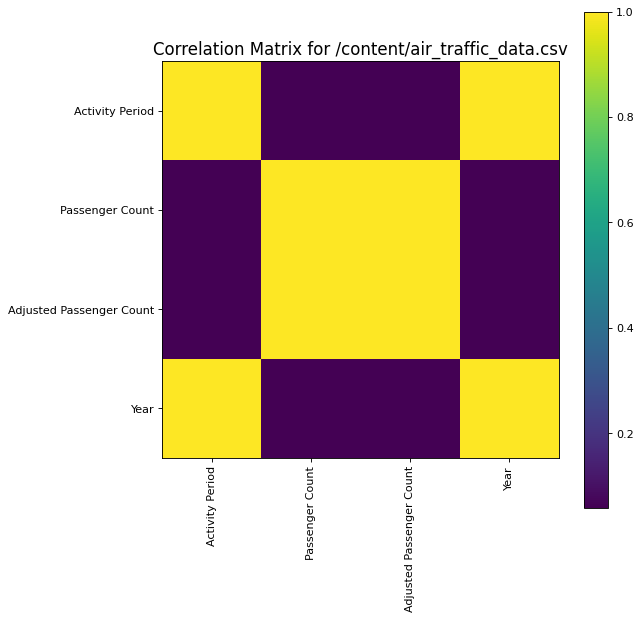

In [6]:
plotCorrelationMatrix(df1, 8)

<ipython-input-3-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


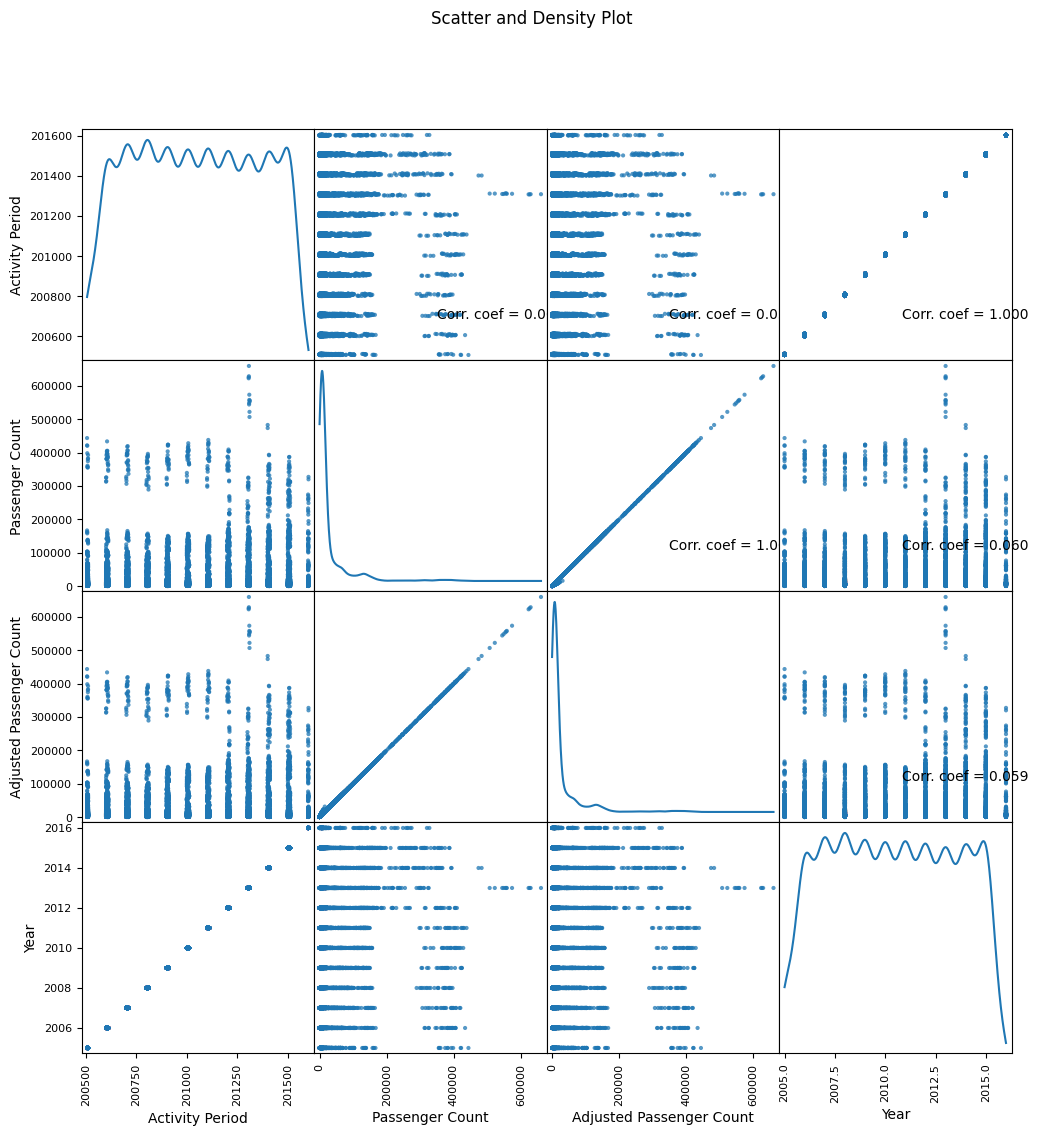

In [7]:
plotScatterMatrix(df1, 12, 10)

<Axes: xlabel='Operating Airline', ylabel='Count'>

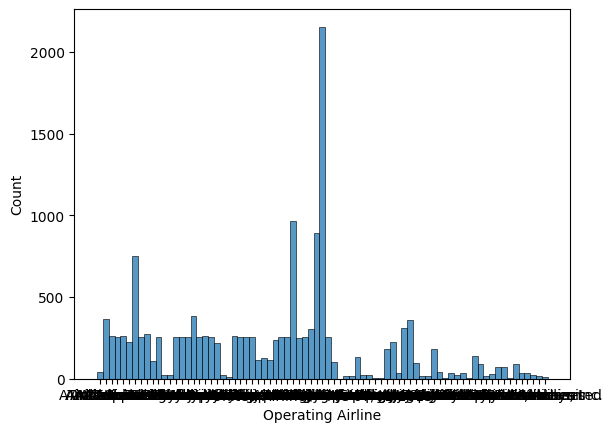

In [8]:
import seaborn as sns
sns.histplot(x = "Operating Airline", data=df1)

<Axes: xlabel='Operating Airline IATA Code', ylabel='Count'>

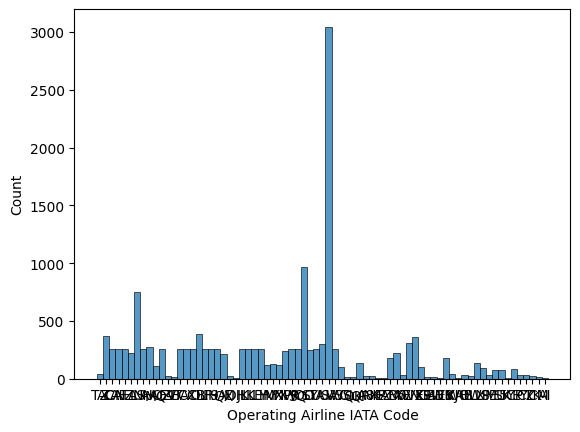

In [9]:
import seaborn as sns
sns.histplot(x = "Operating Airline IATA Code", data=df1)

<Axes: xlabel='Published Airline', ylabel='Count'>

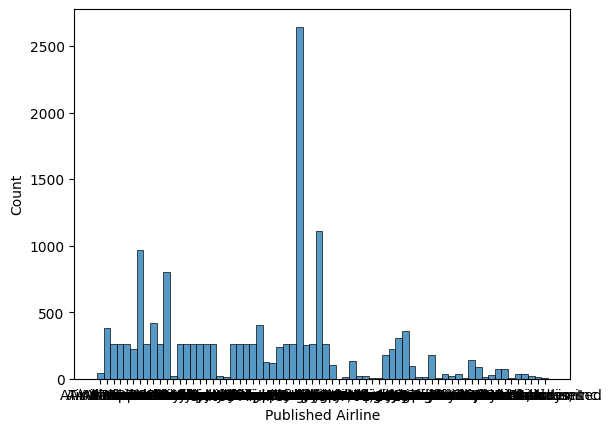

In [10]:
import seaborn as sns
sns.histplot(x = "Published Airline", data=df1)

<Axes: xlabel='Published Airline IATA Code', ylabel='Count'>

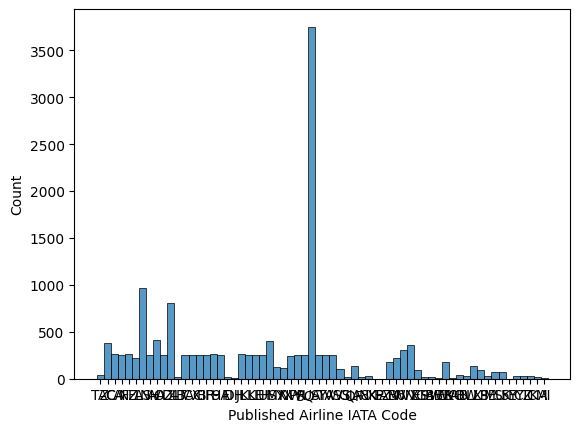

In [ ]:
import seaborn as sns
sns.histplot(x = "Published Airline IATA Code", data=df1)

<Axes: xlabel='GEO Summary', ylabel='Count'>

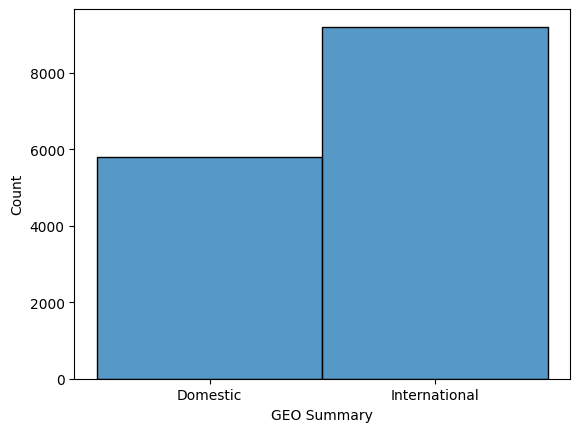

In [ ]:
import seaborn as sns
sns.histplot(x = "GEO Summary", data=df1)

<Axes: xlabel='GEO Region', ylabel='Count'>

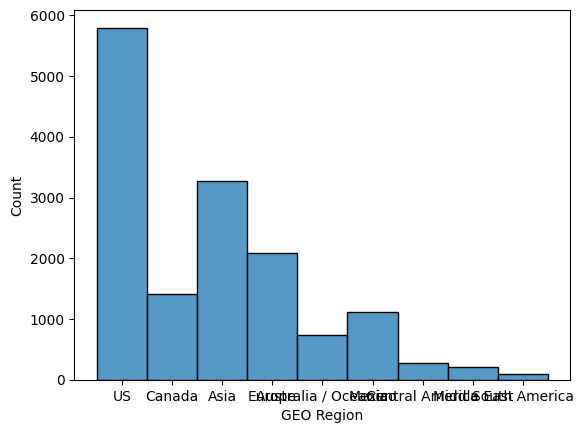

In [ ]:
import seaborn as sns
sns.histplot(x = "GEO Region", data=df1)

<Axes: xlabel='Activity Type Code', ylabel='Count'>

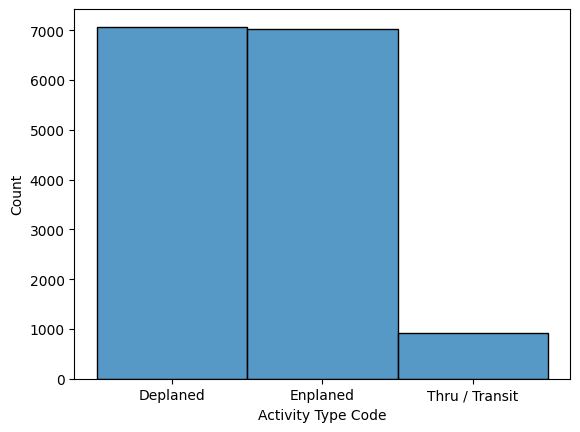

In [ ]:
import seaborn as sns
sns.histplot(x = "Activity Type Code", data=df1)

<Axes: xlabel='Price Category Code', ylabel='Count'>

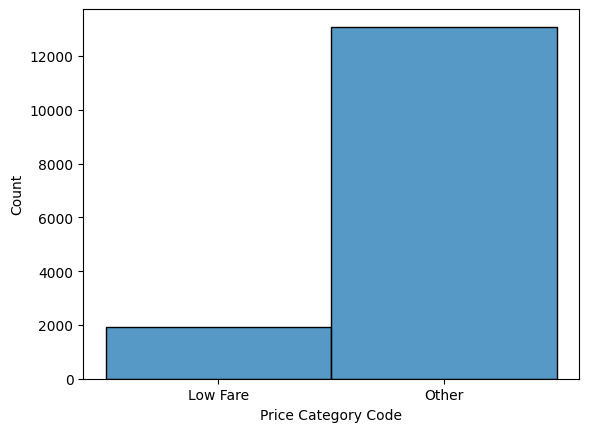

In [ ]:
import seaborn as sns
sns.histplot(x = "Price Category Code", data=df1)

<Axes: xlabel='Terminal', ylabel='Count'>

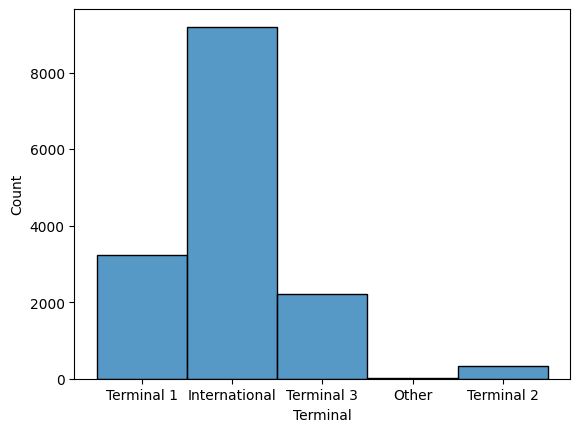

In [ ]:
import seaborn as sns
sns.histplot(x = "Terminal", data=df1)

<Axes: xlabel='Boarding Area', ylabel='Count'>

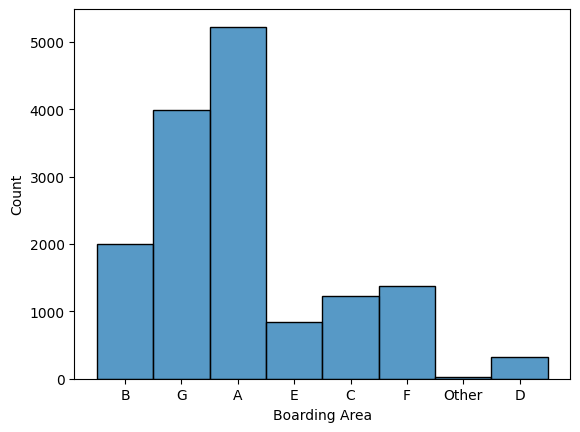

In [ ]:
import seaborn as sns
sns.histplot(x = "Boarding Area", data=df1)

<Axes: xlabel='Passenger Count', ylabel='Count'>

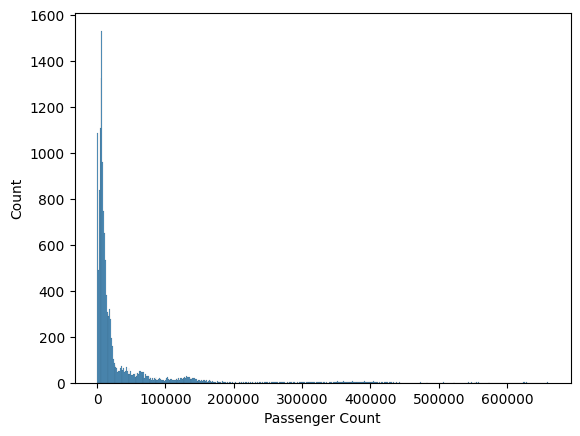

In [ ]:
import seaborn as sns
sns.histplot(x = "Passenger Count", data=df1)

<Axes: xlabel='Adjusted Activity Type Code', ylabel='Count'>

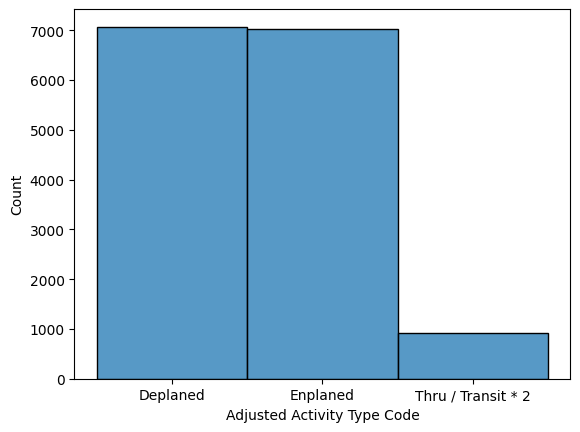

In [ ]:
import seaborn as sns
sns.histplot(x = "Adjusted Activity Type Code", data=df1)

<Axes: xlabel='Adjusted Passenger Count', ylabel='Count'>

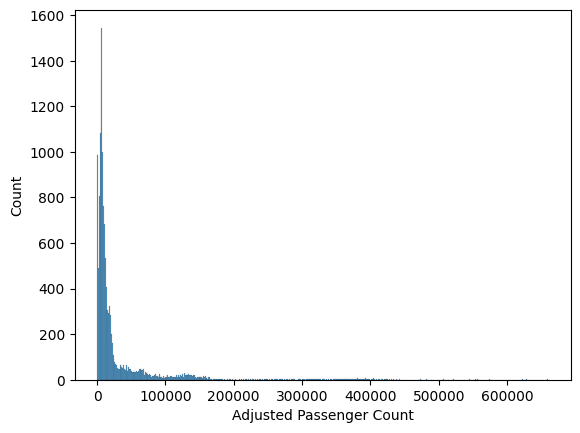

In [ ]:
import seaborn as sns
sns.histplot(x = "Adjusted Passenger Count", data=df1)

<Axes: xlabel='Year', ylabel='Count'>

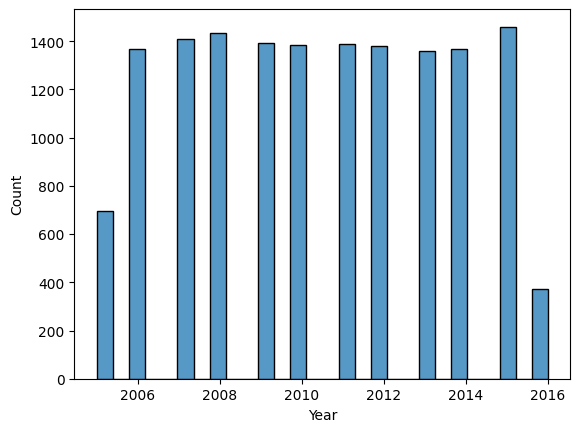

In [ ]:
import seaborn as sns
sns.histplot(x = "Year", data=df1)

<Axes: xlabel='Month', ylabel='Count'>

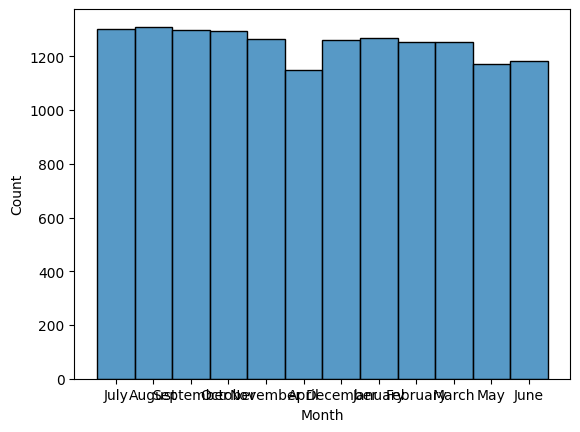

In [ ]:
import seaborn as sns
sns.histplot(x = "Month", data=df1)

<Axes: xlabel='Activity Period', ylabel='Count'>

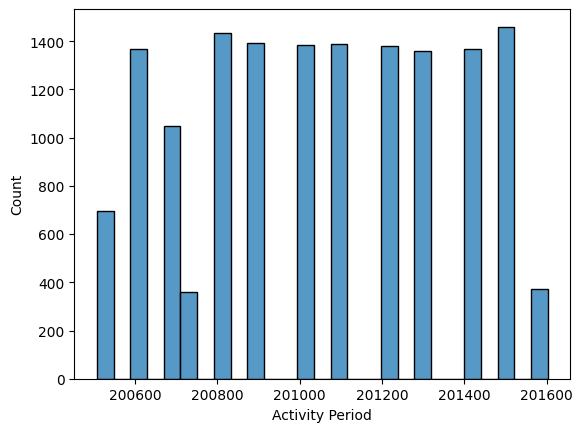

In [ ]:
import seaborn as sns
sns.histplot(x = "Activity Period", data=df1)

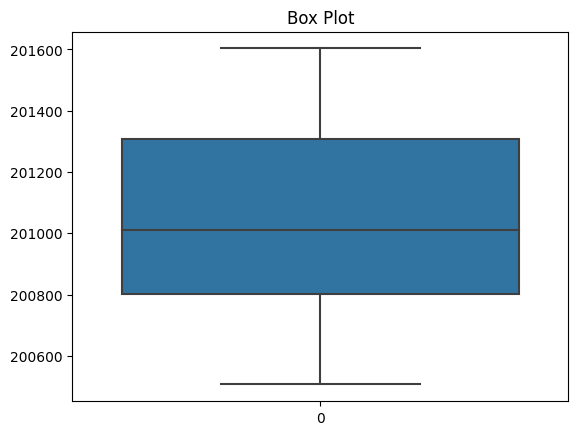

In [ ]:
import matplotlib.pyplot as plt
def Box(df1):
    plt.title("Box Plot")
    sns.boxplot(df1)
    plt.show()
Box(df1['Activity Period'])

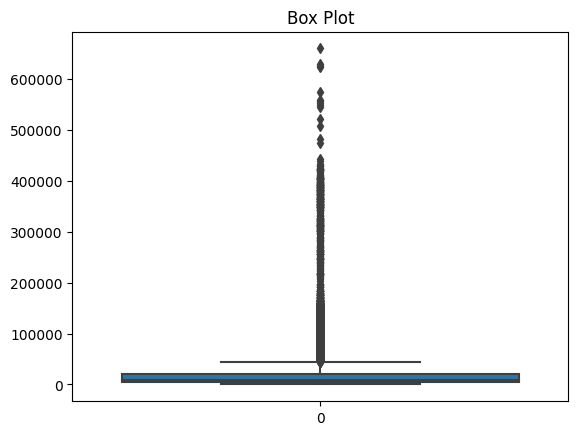

In [ ]:
import matplotlib.pyplot as plt
def Box(df1):
    plt.title("Box Plot")
    sns.boxplot(df1)
    plt.show()
Box(df1['Passenger Count'])

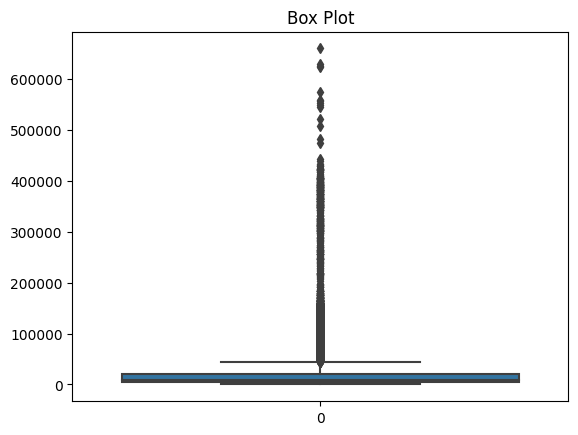

In [ ]:
import matplotlib.pyplot as plt
def Box(df1):
    plt.title("Box Plot")
    sns.boxplot(df1)
    plt.show()
Box(df1['Adjusted Passenger Count'])

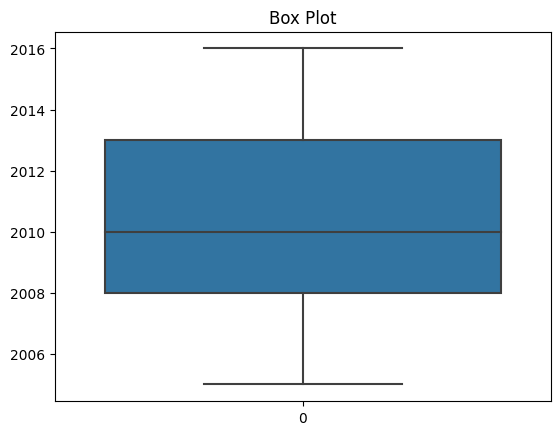

In [ ]:
import matplotlib.pyplot as plt
def Box(df1):
    plt.title("Box Plot")
    sns.boxplot(df1)
    plt.show()
Box(df1['Year'])

In [ ]:
df1.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

In [ ]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
categorical = [var for var in df1.columns if df1[var].dtype == 'O']
print('There are {} numerical variables'.format(len(numerical)))
print('There are {} categorical variables'.format(len(categorical)))

There are 4 numerical variables
There are 12 categorical variables


In [ ]:
df1.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [ ]:
df1 = df1.dropna()
print(df1.shape)

(14953, 16)


In [ ]:
df1.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Grouping by Airline

In [ ]:
grouped_by_airline = df1.groupby("Operating Airline").agg\
({
    "Operating Airline IATA Code" : "count",
    "Passenger Count" : lambda x : np.mean(x), #mean passengers count by airlines

})

grouped_by_airline.rename(columns = {"Operating Airline IATA Code" : "nb_flights",
                                   "Passenger Count" : "mean_passenger_count"},
                          inplace = True)

grouped_by_airline = grouped_by_airline.sort_values(by = "nb_flights", ascending = False)

grouped_by_airline.head(10).round()

,nb_flights,mean_passenger_count
Operating Airline,,
United Airlines - Pre 07/01/2013,2154,48915.0
SkyWest Airlines,963,37084.0
United Airlines,892,72732.0
Alaska Airlines,751,17252.0
Delta Air Lines,386,68498.0
Air Canada,366,18252.0
Virgin America,362,74405.0
Southwest Airlines,309,81188.0
US Airways,304,55318.0


 ## FEATURE ENGINEERING

In [ ]:
def to_lower(data):
    """
    All columns in lower strings and underscored
    """
    data.columns = map(lambda col: col.lower().replace(" ", "_"), data.columns)

    return data

def count_frequency(data, col, colname="frequency"):
    """
    Create a column from dataframe named frequency
    """
    data[colname] = data.groupby(col)[col].transform('count')

    return data

# Dumify the object column
def dummify(data):
    """
    Dummify data columns object
    """
    dummify = data.loc[:, data.dtypes == object]
    for col in dummify.columns:
        df = pd.get_dummies(data[col], drop_first=True, prefix=col)
        data = pd.concat([data, df], axis=1)

    return data

def transform_df(data):
    "Wrapper of all functions"
    data = to_lower(data)
    data = count_frequency(data, 'operating_airline')
    data = dummify(data)

    return data

In [ ]:
df1 = df1.drop(columns=['Year', 'Month'])
df1 = transform_df(df1)
print(df1.shape)

(14953, 310)


In [ ]:
df1.head().T

,0,1,2,3,4
activity_period,200507,200507,200507,200507,200507
operating_airline,ATA Airlines,ATA Airlines,ATA Airlines,Air Canada,Air Canada
operating_airline_iata_code,TZ,TZ,TZ,AC,AC
published_airline,ATA Airlines,ATA Airlines,ATA Airlines,Air Canada,Air Canada
published_airline_iata_code,TZ,TZ,TZ,AC,AC
...,...,...,...,...,...
boarding_area_F,0,0,0,0,0
boarding_area_G,0,0,0,0,0
boarding_area_Other,0,0,0,0,0
adjusted_activity_type_code_Enplaned,0,1,0,0,1


In [ ]:
prep_data = df1.copy()
prep_data = prep_data.drop(columns = prep_data.loc[:, prep_data.dtypes == object])

In [ ]:
import statsmodels.api as sm
X = prep_data.drop(['adjusted_passenger_count', 'passenger_count'], axis=1)
y = prep_data["adjusted_passenger_count"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     adjusted_passenger_count   R-squared:                       0.567
Model:                                  OLS   Adj. R-squared:                  0.564
Method:                       Least Squares   F-statistic:                     206.8
Date:                      Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                              04:33:42   Log-Likelihood:            -1.7906e+05
No. Observations:                     14953   AIC:                         3.583e+05
Df Residuals:                         14858   BIC:                         3.590e+05
Df Model:                                94                                         
Covariance Type:                  nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
activity_period                                        3.5962      1.206      2.982      0.003       1.233       5.960
frequency                                            -79.4901     29.404     -2.703      0.007    -137.125     -21.855
operating_airline_Aer Lingus                       -2.286e+04   7204.929     -3.173      0.002    -3.7e+04   -8741.248
operating_airline_Aeromexico                       -1.485e+04   6577.556     -2.258      0.024   -2.77e+04   -1956.609
operating_airline_Air Berlin                       -2.434e+04   7742.712     -3.144      0.002   -3.95e+04   -9167.938
operating_airline_Air Canada                        9036.1624   2603.542      3.471      0.001    3932.899    1.41e+04
operating_airline_Air Canada Jazz                   -1.49e+04   7541.634     -1.976      0.048   -2.97e+04    -122.009
operating_airline_Air China                        -2.442e+04   5976.505     -4.085      0.000   -3.61e+04   -1.27e+04
operating_airline_Air France                       -1.706e+04   5969.965     -2.858      0.004   -2.88e+04   -5359.476
operating_airline_Air India Limited                -3.089e+04   8619.439     -3.584      0.000   -4.78e+04    -1.4e+04
operating_airline_Air New Zealand                  -1.582e+04   5982.499     -2.644      0.008   -2.75e+04   -4092.101
operating_airline_AirTran Airways                   -1.31e+04   6333.966     -2.068      0.039   -2.55e+04    -680.381
operating_airline_Alaska Airlines                   1.517e+04   1.18e+04      1.291      0.197   -7865.758    3.82e+04
operating_airline_All Nippon Airways               -2.456e+04   5983.339     -4.104      0.000   -3.63e+04   -1.28e+04
operating_airline_Allegiant Air                    -1.957e+04   8146.980     -2.402      0.016   -3.55e+04   -3598.895
operating_airline_American Airlines                 3.864e+04   6234.524      6.198      0.000    2.64e+04    5.09e+04
operating_airline_American Eagle Airlines          -2.513e+04   8286.536     -3.033      0.002   -4.14e+04   -8891.316
operating_airline_Ameriflight                      -1.555e+04   3876.625     -4.011      0.000   -2.31e+04   -7952.407
operating_airline_Asiana Airlines                  -2.319e+04   5968.260     -3.885      0.000   -3.49e+04   -1.15e+04
operating_airline_Atlantic Southeast Airlines      -4.945e+04   9390.654     -5.266      0.000   -6.79e+04    -3.1e+04
operating_airline_Atlas Air, Inc                   -9283.4357   6497.897     -1.429      0.153    -2.2e+04    3453.245
operating_airline_BelAir Airlines                  -4.422e+04   1.58e+04     -2.808      0.005   -7.51e+04   -1.33e+04
operating_airline_British Airways         

In [ ]:
df1.adjusted_passenger_count.mean()

29437.338861766868

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11962, 297)
(11962,)
(2991, 297)
(2991,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
from xgboost import XGBRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics
regressor = XGBRegressor()

regressor.fit(X_train, y_train)
# prediction on training data
training_data_prediction = regressor.predict(X_train)
mse = mean_squared_error(y_train,training_data_prediction)
xgb=(mse)
print("MSE=",xgb)
print("RMSE of Training =",sqrt(xgb))
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae=mean_absolute_error(y_train,training_data_prediction)
print("MAE=" ,mae)
# prediction on test data
test_data_prediction = regressor.predict(X_test)
'''mse2 = mean_squared_error(y_test,training_data_prediction)
print("MSE of test =",mse2)'''
# R squared Value
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared value = ', r2_train)
print('R Squared value = ', r2_test)

MSE= 20980805.514603857
RMSE of Training = 4580.480926125973
MAE= 2357.6056718059335
R Squared value =  0.9939556872180143
R Squared value =  0.9863306369736692


<Axes: >

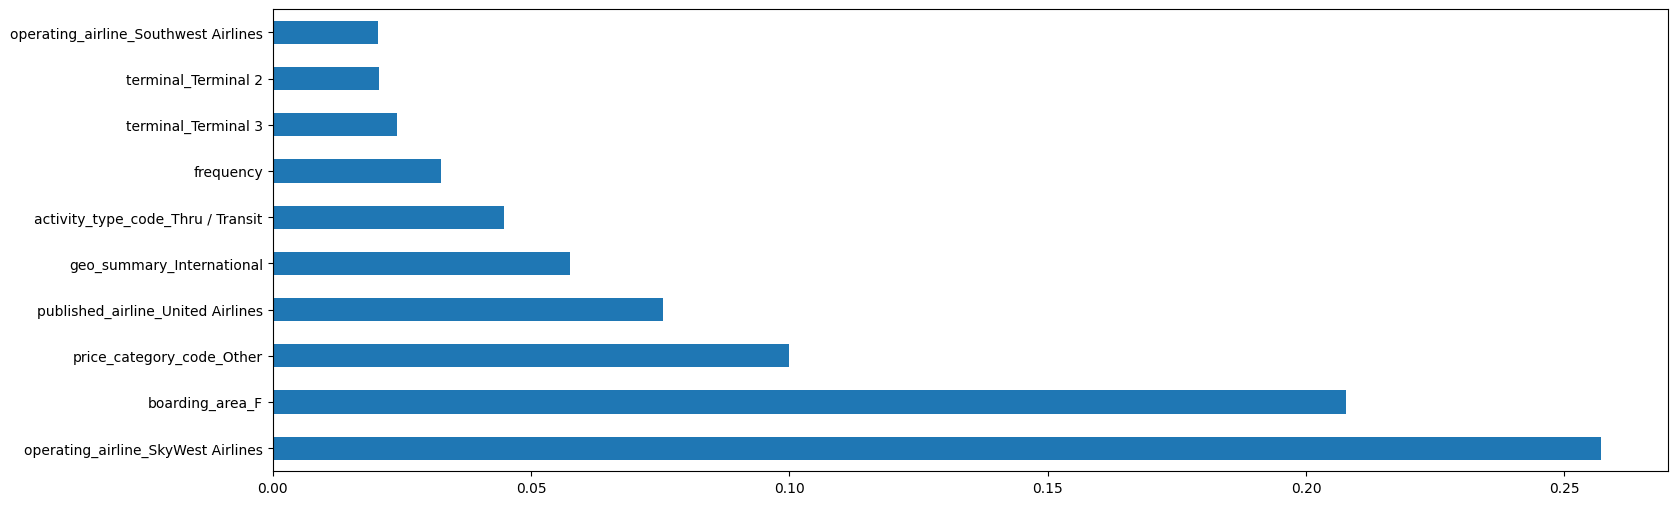

In [ ]:
importance = pd.Series(regressor.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.head(10).plot.barh(figsize=(18,6))

In [ ]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create a Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Calculate the Mean Squared Error (MSE)
BR = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", BR)
mae = mean_absolute_error(y_test,y_pred)
print("mae:",mae)
print("rmse:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_test = metrics.r2_score(y_test, y_pred)
print(r2_test)

Mean Squared Error: 1412300873.8266833
mae: 18224.65958166199
rmse: 37580.59171735702
0.5509052568562518


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kk=KNeighborsRegressor()
kl=kk.fit(X_train, y_train.values.ravel())

In [ ]:
yp=kl.predict(X_test)
print(yp)
print(y_test)

[11618.2  3809.2  6532.8 ... 21655.2  1517.  33292. ]
1374     11729
2033      6260
2176      2104
10570     5370
10098    13812
         ...  
1494      8717
13987    89861
14491    66601
6384       553
4058      8790
Name: adjusted_passenger_count, Length: 2991, dtype: int64


In [ ]:
from sklearn import metrics
print(np.sqrt(mean_squared_error(y_test,yp)))
knn=mean_squared_error(y_test,yp )
print(mean_squared_error(y_test,yp ))
print(mean_absolute_error(y_test,yp ))
r2 = metrics.r2_score(y_test,yp)
print(f"R-squared score: {r2}")

35150.876652369996
1235584129.4301302
13230.61223671013
R-squared score: 0.6070990625847248


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
cc=svm.SVR(kernel='linear')
cl=cc.fit(X_train,y_train.values.ravel())

In [ ]:
yp=cl.predict(X_test)
print(yp)

[-184883.05666541 -180879.96022986   63818.25070764 ...  211469.94943811
  -41745.46291541  100985.63596155]


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("rmse=:",np.sqrt(mean_squared_error(y_test,yp)))
sv=(mean_squared_error(y_test,yp))
print(sv)
print(mean_absolute_error(y_test,yp))
r2 = metrics.r2_score(y_test,yp)
print(f"R-squared score:{r2}")

rmse=: 130937.36935207839
17144594692.842598
111126.69393036421
R-squared score:-4.451775533511919


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
yp = model.predict(X_test)
ada=mean_squared_error(y_test,yp )
print(mean_squared_error(y_test,yp ))
print("rmse=:",np.sqrt(mean_squared_error(y_test,yp)))
print(mean_absolute_error(y_test,yp ))
r2 = metrics.r2_score(y_test,yp)
print(f"R-squared score:{r2}")

3969827839.436643
rmse=: 63006.56981170014
28723.659311267136
R-squared score:-0.26235765120363985


,Model,Error_score
2,SVM,1.714459e+10
3,AdaBoostClassifier,3.969828e+09
4,BayesianRidge,1.412301e+09
1,KNeighbours,1.235584e+09
0,XGBRegressor,2.098081e+07


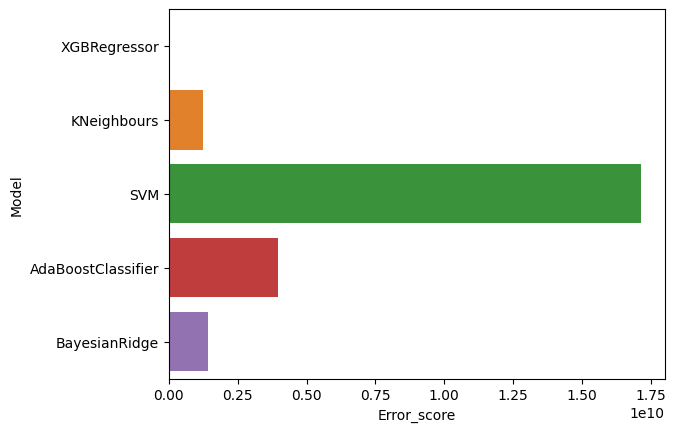

In [ ]:
import seaborn as sns
models = pd.DataFrame({
    'Model':['XGBRegressor', 'KNeighbours', 'SVM', 'AdaBoostClassifier', 'BayesianRidge'],
    'Error_score' :[xgb, knn, sv, ada, BR]
})
models
sns.barplot(x='Error_score', y='Model', data=models)

models.sort_values(by='Error_score', ascending=False)